In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import torch
from torchvision import datasets, transforms
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.animation as animation

## Full Batch GD

In [2]:
num_samples = 40
np.random.seed(45)

# Generate data
x1 = np.random.uniform(-20, 20, num_samples)
f_x = 100*x1 + 1
eps = np.random.randn(num_samples)
y = f_x + eps
print(x1.shape,y.shape)

(40,) (40,)


In [3]:
theta=torch.randn((2,1),requires_grad=True)

x=torch.tensor(x1,dtype=torch.float32).view(-1, 1)       #reshape is same as view
x_FB_1 =torch.cat((torch.ones(x.shape[0],1),x), dim=1)
y_FB_1 =torch.tensor(y, dtype=torch.float32).view(-1, 1)

theta_st = torch.linalg.inv(x_FB_1.T @ x_FB_1) @ (x_FB_1.T @ y_FB_1)
print(f"theta from normal eqn. or true minimizer: {theta_st}")

theta_hist_FB_1 = []
loss_hist_FB_1 =[]
learning_rate=0.001
beta = 0.08
v_t = torch.zeros_like(theta)
Epoch=0


while(True):
    Epoch+=1
    theta_old=theta.clone()
    theta_hist_FB_1.append(theta_old.detach().numpy().flatten())
    y_pred=torch.matmul(x_FB_1,theta)
    loss=torch.mean((y_FB_1-y_pred)**2)
    loss_hist_FB_1.append(loss.clone().detach().item())
    loss.backward()       # As soon as you alled the backward func in the loss it calculates the grad  of loss wrt defined var which has req_grad=True and stores in the defined var.grad
    with torch.no_grad():
        v_t = beta*v_t + (1-beta)*theta.grad
        theta-=learning_rate*v_t
        theta.grad.zero_()
    
    # Print every 50 epochs
    if Epoch % 50 == 0:
        print(f"Step {Epoch}, Loss: {loss.item():.6f}, theta:\n{theta}")
        
    if(torch.norm(theta-theta_st)<0.001):
        break

print(Epoch) 
# print(loss_hist)

theta from normal eqn. or true minimizer: tensor([[ 0.9506],
        [99.9841]])
Step 50, Loss: 2.859936, theta:
tensor([[-0.5684],
        [99.9636]], requires_grad=True)
Step 100, Loss: 2.457603, theta:
tensor([[-0.4269],
        [99.9655]], requires_grad=True)
Step 150, Loss: 2.126751, theta:
tensor([[-0.2985],
        [99.9672]], requires_grad=True)
Step 200, Loss: 1.854698, theta:
tensor([[-0.1821],
        [99.9688]], requires_grad=True)
Step 250, Loss: 1.630992, theta:
tensor([[-7.6502e-02],
        [ 9.9970e+01]], requires_grad=True)
Step 300, Loss: 1.447040, theta:
tensor([[1.9224e-02],
        [9.9972e+01]], requires_grad=True)
Step 350, Loss: 1.295761, theta:
tensor([[ 0.1060],
        [99.9727]], requires_grad=True)
Step 400, Loss: 1.171364, theta:
tensor([[ 0.1847],
        [99.9738]], requires_grad=True)
Step 450, Loss: 1.069091, theta:
tensor([[ 0.2561],
        [99.9747]], requires_grad=True)
Step 500, Loss: 0.984971, theta:
tensor([[ 0.3209],
        [99.9756]], requir

In [4]:
np.random.seed(45)
num_samples = 40
    
# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

In [5]:
theta=torch.randn((2,1),requires_grad=True)

x=torch.tensor(x1,dtype=torch.float32).view(-1, 1)       #reshape is same as view
x_FB_2=torch.cat((torch.ones(x.shape[0],1),x), dim=1)
y_FB_2 =torch.tensor(y, dtype=torch.float32).view(-1, 1)

theta_hist_FB_2 = []
loss_hist_FB_2=[]
learning_rate=0.001
beta = 0.08
v_t = torch.zeros_like(theta)
Epoch=0

theta_st = torch.linalg.inv(x_FB_2.T @ x_FB_2) @ (x_FB_2.T @ y_FB_2)
print(f"theta from normal eqn. or true minimizer: {theta_st}")

while(True):
    Epoch+=1
    theta_old=theta.clone()
    theta_hist_FB_2.append(theta_old.detach().numpy().flatten())
    y_pred=torch.matmul(x_FB_2,theta)
    loss=torch.mean((y_FB_2-y_pred)**2)
    loss_hist_FB_2.append(loss.clone().detach().item())
    loss.backward()       # As soon as you alled the backward func in the loss it calculates the grad  of loss wrt defined var which has req_grad=True and stores in the defined var.grad
    with torch.no_grad():
        v_t = beta*v_t + (1-beta)*theta.grad
        theta-=learning_rate*v_t
        theta.grad.zero_()
    
    # Print every 50 epochs
    if Epoch % 50 == 0:
        print(f"Step {Epoch}, Loss: {loss.item():.6f}, theta:\n{theta}")
        
    if(torch.norm(theta-theta_st)<0.001):
        break

print(Epoch) 
# print(loss_hist)

theta from normal eqn. or true minimizer: tensor([[3.9507],
        [2.6825]])


Step 50, Loss: 22.378183, theta:
tensor([[-0.3654],
        [-1.8087]], requires_grad=True)
Step 100, Loss: 19.328472, theta:
tensor([[ 0.0100],
        [-1.7034]], requires_grad=True)
Step 150, Loss: 16.781607, theta:
tensor([[ 0.3505],
        [-1.5985]], requires_grad=True)
Step 200, Loss: 14.648786, theta:
tensor([[ 0.6593],
        [-1.4941]], requires_grad=True)
Step 250, Loss: 12.857287, theta:
tensor([[ 0.9396],
        [-1.3904]], requires_grad=True)
Step 300, Loss: 11.347518, theta:
tensor([[ 1.1940],
        [-1.2878]], requires_grad=True)
Step 350, Loss: 10.070632, theta:
tensor([[ 1.4250],
        [-1.1864]], requires_grad=True)
Step 400, Loss: 8.986562, theta:
tensor([[ 1.6348],
        [-1.0862]], requires_grad=True)
Step 450, Loss: 8.062426, theta:
tensor([[ 1.8255],
        [-0.9875]], requires_grad=True)
Step 500, Loss: 7.271222, theta:
tensor([[ 1.9987],
        [-0.8904]], requires_grad=True)
Step 550, Loss: 6.590754, theta:
tensor([[ 2.1562],
        [-0.7949]], r

In [6]:
def visualize_convergence(x, y, theta_hist, animate=False):
    """
    Visualize gradient descent convergence over the first 15 epochs.

    Parameters:
    - x : numpy array of shape (n_samples, 2)  # with bias column
    - y : numpy array of shape (n_samples, 1)
    - theta_hist : list/array of parameter vectors (θ0, θ1)
    - animate : bool, if True makes an animation, else static plot
    """

    # Take only first 15 steps
    theta_hist = np.array(theta_hist[:15])

    # Create parameter grid
    t0_vals = np.linspace(-10, 10, 200)
    t1_vals = np.linspace(50, 150, 200)
    T0, T1 = np.meshgrid(t0_vals, t1_vals)

    # Compute loss surface
    Z = np.zeros_like(T0)
    for i in range(T0.shape[0]):
        for j in range(T0.shape[1]):
            th = np.array([T0[i, j], T1[i, j]])
            y_pred = x @ th.reshape(-1, 1)
            Z[i, j] = np.mean((y - y_pred) ** 2)

    if not animate:
        # Static contour plot
        plt.figure(figsize=(8,6))
        plt.contourf(T0, T1, Z, levels=50, cmap="viridis")
        plt.colorbar(label="MSE Loss")
        plt.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)

        # Plot path
        plt.plot(theta_hist[:,0], theta_hist[:,1], 'ro-', label="Path")
        for i, (t0, t1) in enumerate(theta_hist):
            plt.text(t0, t1, str(i+1), color="white", fontsize=8)

        plt.xlabel("θ₀ (bias)")
        plt.ylabel("θ₁ (slope)")
        plt.title("Gradient Descent Convergence (15 Epochs)")
        plt.legend()
        plt.show()

    else:
        # Animated version
        fig, ax = plt.subplots(figsize=(8,6))
        ax.contourf(T0, T1, Z, levels=50, cmap="viridis")
        ax.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)
        line, = ax.plot([], [], 'ro-', label="Path")
        ax.set_xlabel("θ₀ (bias)")
        ax.set_ylabel("θ₁ (slope)")
        ax.set_title("Gradient Descent Convergence")
        ax.legend()

        def update(frame):
            line.set_data(theta_hist[:frame+1,0], theta_hist[:frame+1,1])
            return line,

        ani = animation.FuncAnimation(fig, update, frames=len(theta_hist), interval=500, blit=True)
        plt.show()
        return ani

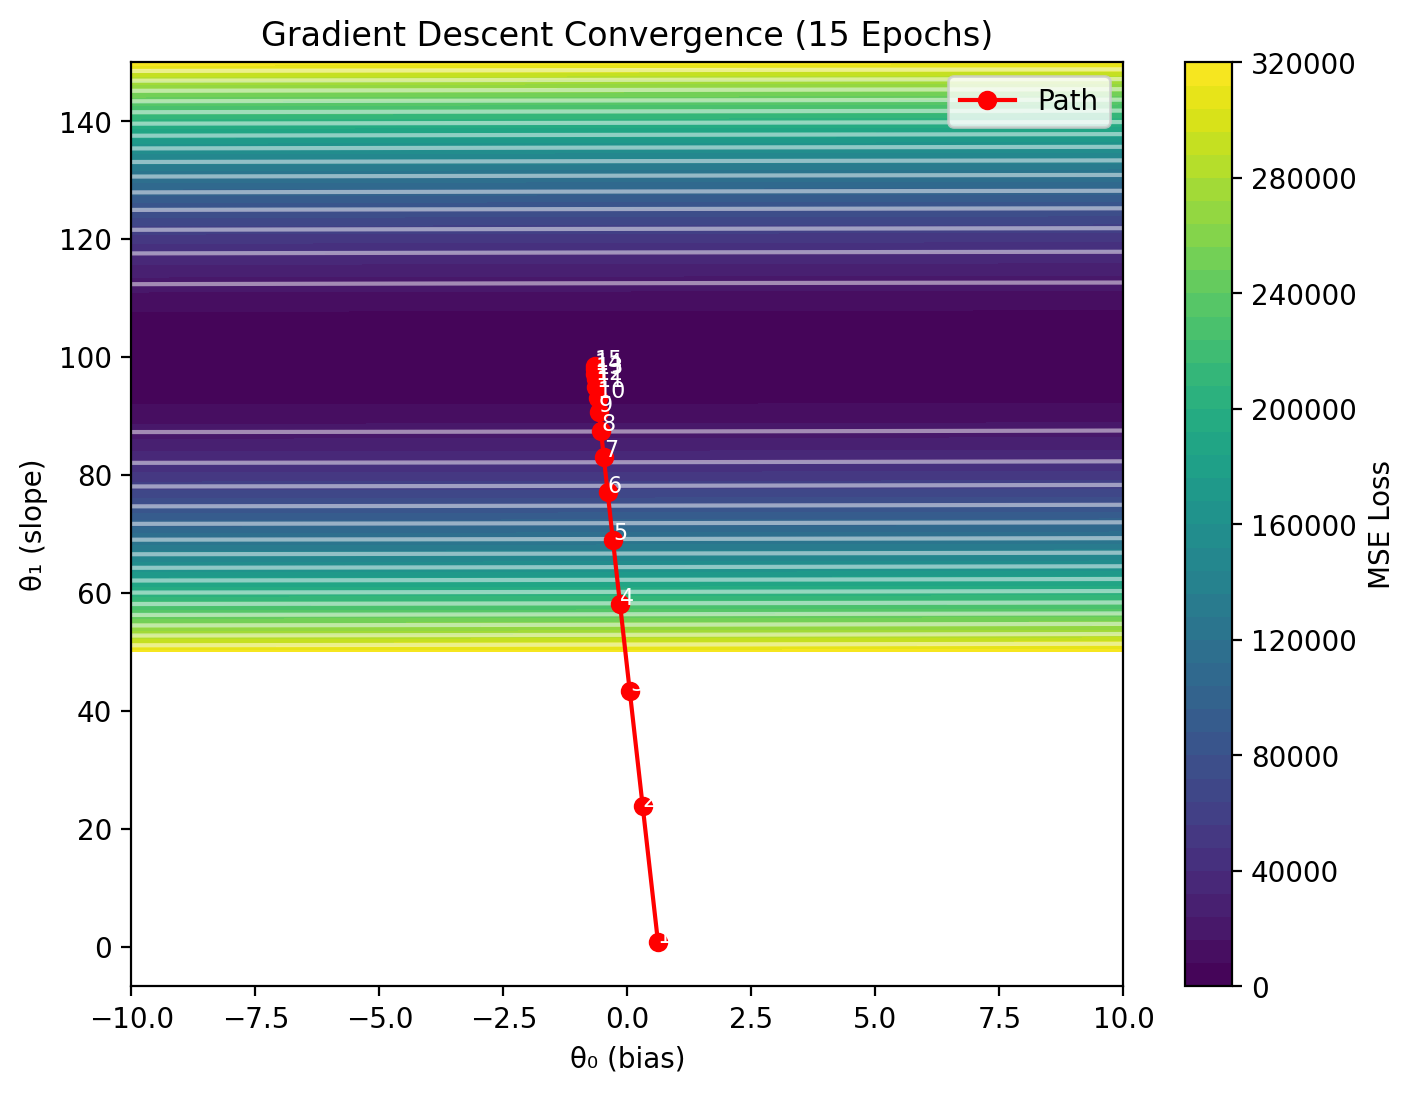

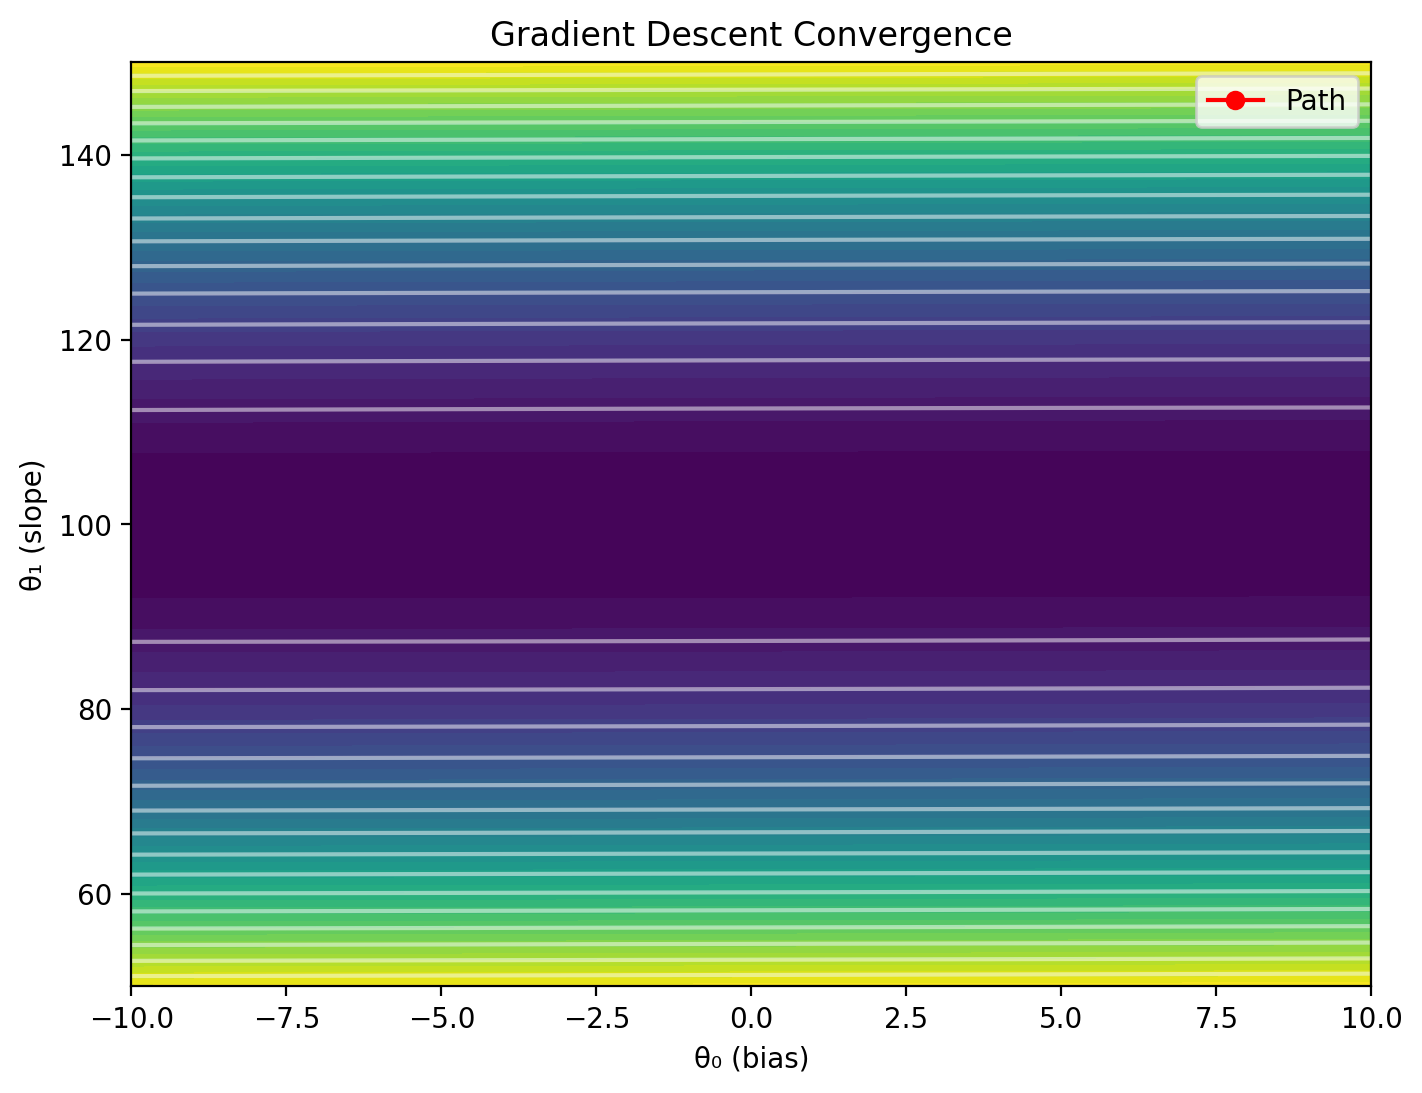

In [8]:
# assuming you already have theta_hist, x, y
visualize_convergence(x_FB_1.numpy(), y_FB_1.numpy(), theta_hist_FB_1, animate=False)  # static
# or
ani = visualize_convergence(x_FB_1.numpy(), y_FB_1.numpy(), theta_hist_FB_1, animate=True)  # animated
# ani.save("gd_convergence_1.gif", writer="pillow")  # save GIF

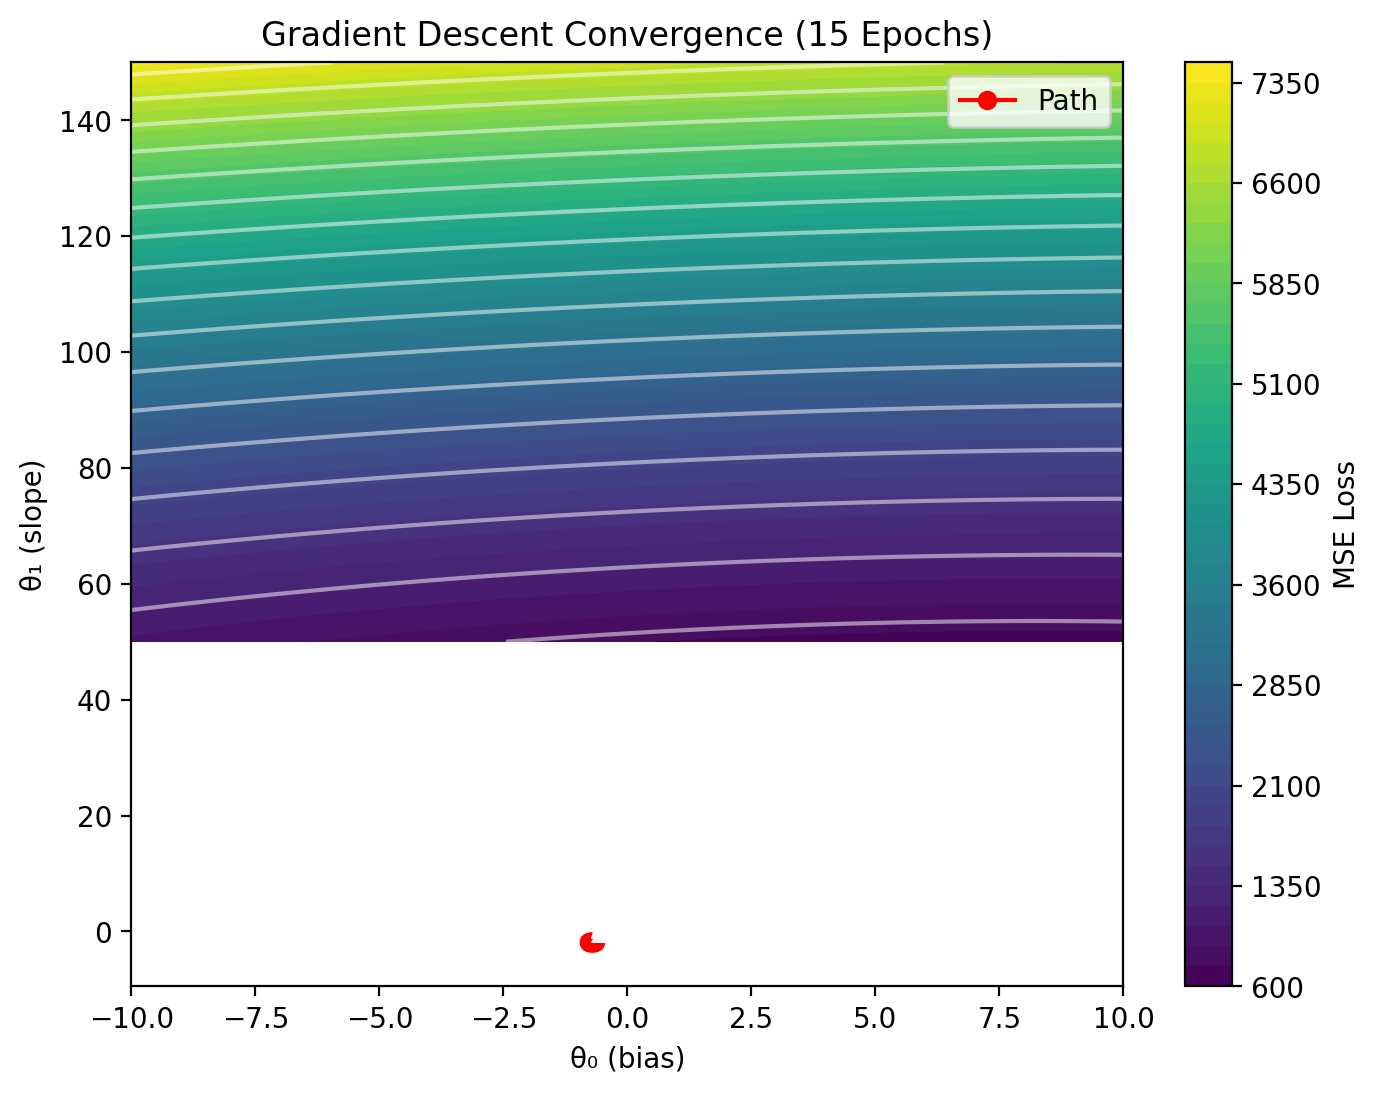

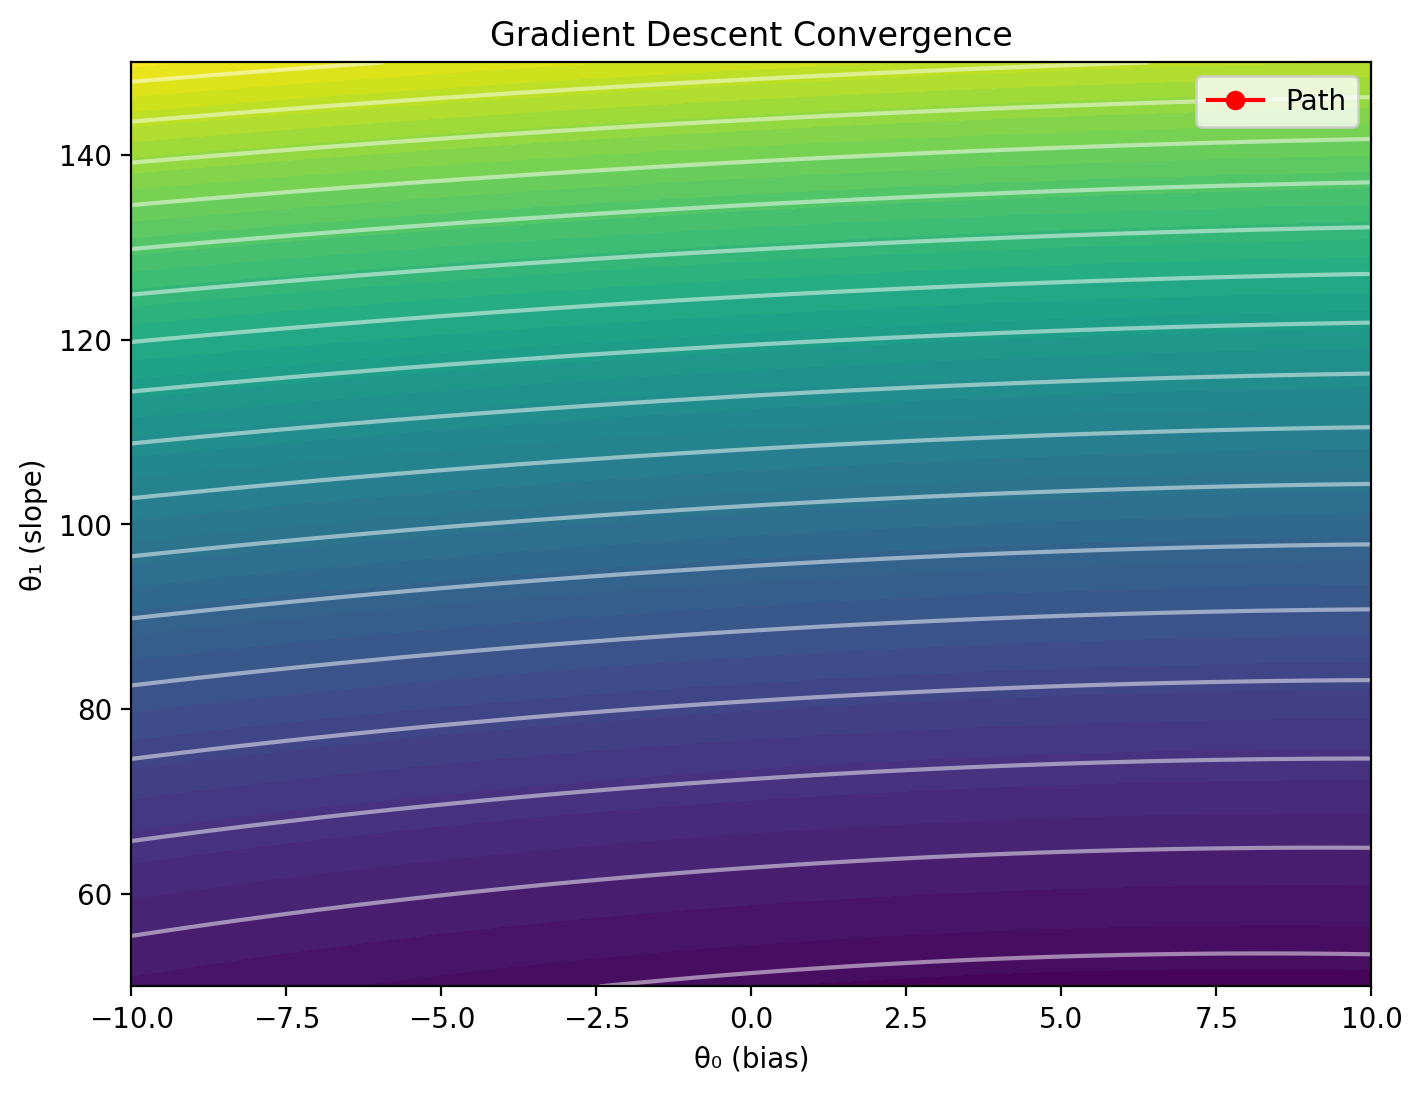

In [ ]:
# assuming you already have theta_hist, x, y
visualize_convergence(x_FB_2.numpy(), y_FB_2.numpy(), theta_hist_FB_2, animate=False)  # static
# or
ani = visualize_convergence(x_FB_2.numpy(), y_FB_2.numpy(), theta_hist_FB_2, animate=True)  # animated
# ani.save("gd_convergence_1000.gif", writer="pillow")  # save GIF

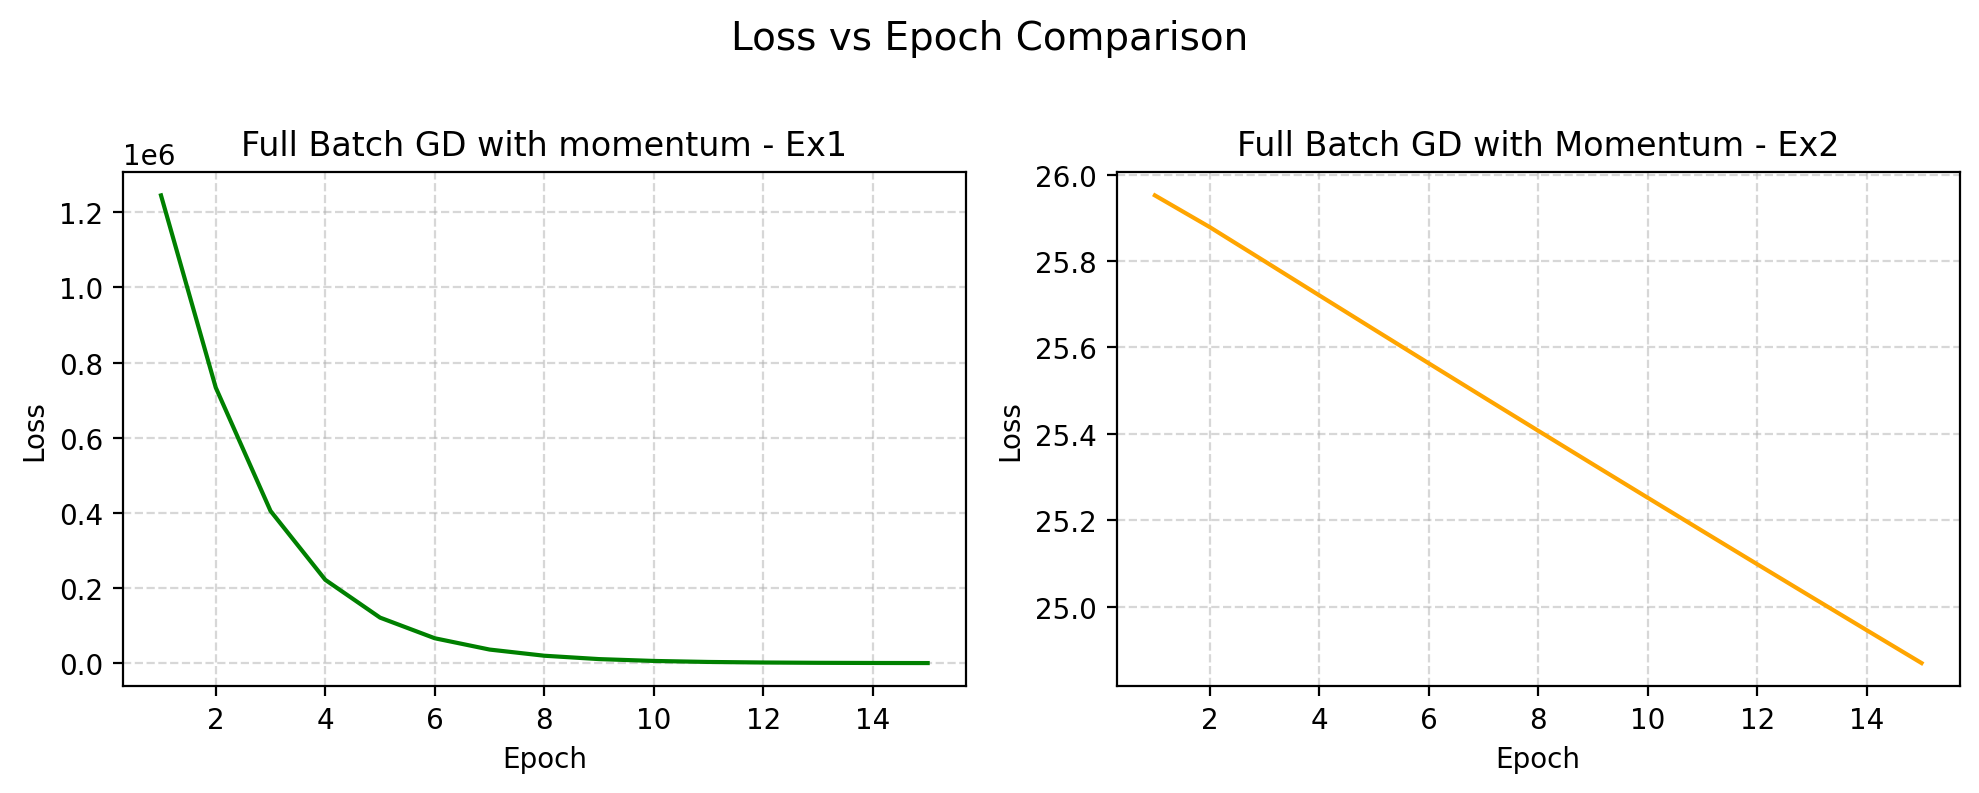

In [ ]:
Epoch_hist = np.arange(1, 16)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# --- Left plot: FB_1 ---
axs[0].plot(Epoch_hist, loss_hist_FB_1[0:15], color='g')
axs[0].set_title("Full Batch GD with momentum - Ex1")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].grid(True, linestyle='--', alpha=0.5)

# --- Right plot: FB_2 ---
axs[1].plot(Epoch_hist, loss_hist_FB_2[0:15], color='orange')
axs[1].set_title("Full Batch GD with Momentum - Ex2")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.suptitle("Loss vs Epoch Comparison", fontsize=14)
plt.tight_layout()
plt.show()

In [14]:
num_samples = 40
np.random.seed(45) 
    
# Generate data
x1 = np.random.uniform(-20, 20, num_samples)
f_x = 100*x1 + 1
eps = np.random.randn(num_samples)
y = f_x + eps